## Notebook Bike Sharing Dataset

In [1]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import warnings as ws

ws.simplefilter(action="ignore", category=FutureWarning)

## Gathering Data

In [2]:
# membaca data day.csv
df_day = pd.read_csv("data/day.csv")
df_day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [3]:
# membaca data hour.csv
df_hour = pd.read_csv("data/hour.csv")
df_hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


## Assessing Data

In [4]:
# melihat jumlah dan tipe data pada setiap column di df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# melihat jumlah dan tipe data pada setiap column di df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# mengecek data duplikat di df_day
print("data duplikat berjumlah:",df_day.duplicated().sum())

data duplikat berjumlah: 0


In [7]:
# mengecek data duplikat di df_hour
print("data duplikat berjumlah:",df_hour.duplicated().sum())

data duplikat berjumlah: 0


In [8]:
# mengecek data Nan di df_day
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# mengecek data Nan di df_hour
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Cleaning Data

In [10]:
# merubah dtype dteday di df_day.
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [11]:
# merubah dtype dteday di df_hour.
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [12]:
# merubah nilai column season di df_day.
season = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

df_day["season"] = df_day["season"].replace(season)
df_day.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [13]:
# merubah nilai column season di df_hour.
season = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

df_hour["season"] = df_hour["season"].replace(season)
df_hour.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [14]:
# menghapus column yr dan mnth karena menurut saya column dteday sudah cukup mewakili tahun dan bulan di df_day.
df_day.drop(["yr", "mnth"], axis=1, inplace=True)
df_day.head(2)

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [15]:
# menhapus column yr dan mnth di df_hour
df_hour.drop(["yr", "mnth"], axis=1, inplace=True)
df_hour.head(2)

,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


## Exploratory Data Analyst

In [16]:
# melihat jumlah penyewa sepeda berdasarkan season dari tahun 2011-2012
df_day.groupby(by=[df_day["dteday"].dt.year, "season"]).agg({
    "cnt": "sum"
})

cnt
dteday season        
2011   Fall    419650
       Spring  150000
       Summer  347316
       Winter  326137
2012   Fall    641479
       Spring  321348
       Summer  571273
       Winter  515476

In [17]:
# melihat jumlah penyewa sepda paling banyak berdasarkan bulan di tahun 2011
df_day[df_day["dteday"].dt.year < 2012].groupby(by=[df_day["dteday"].dt.year, df_day["dteday"].dt.month]).agg({
    "cnt": "sum"
}).sort_values(by= "cnt", ascending=False)

cnt
dteday dteday        
2011   6       143512
       7       141341
       8       136691
       5       135821
       9       127418
       10      123511
       11      102167
       4        94870
       12       87323
       3        64045
       2        48215
       1        38189

In [18]:
# melihat jumlah penyewa sepeda paling banyak berdasarkan bulan di tahun 2012
df_day[df_day["dteday"].dt.year >= 2012].groupby(by=[df_day["dteday"].dt.year, df_day["dteday"].dt.month]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

cnt
dteday dteday        
2012   9       218573
       8       214503
       7       203607
       6       202830
       10      198841
       5       195865
       4       174224
       3       164875
       11      152664
       12      123713
       2       103137
       1        96744

In [19]:
# melihat jumlah penyewa sepda berdasarkan kondisi cuaca di tahun 2011 dan 2012
df_hour.groupby(by=[df_hour["dteday"].dt.year, "weathersit"]).agg({
    "cnt": "sum"
})

cnt
dteday weathersit         
2011   1            875053
       2            300519
       3             67495
       4                36
2012   1           1463120
       2            495433
       3             90836
       4               187

In [20]:
# melihat max, min, mean faktor lingkungan berdasarkan musim di tahun 2011 dan 2012
df_hour.groupby(by=[df_hour["dteday"].dt.year, "season"]).agg({
    "temp": ["max", "min", "mean"],
    "atemp": ["max", "min", "mean"],
    "hum": ["max", "min", "mean"],
    "windspeed": ["max", "min", "mean"]
})

temp                   atemp                     hum        \
                max   min      mean     max     min      mean   max   min   
dteday season                                                               
2011   Fall    0.96  0.38  0.701339  1.0000  0.3939  0.654150  1.00  0.16   
       Spring  0.70  0.02  0.275348  0.6364  0.0000  0.276990  1.00  0.00   
       Summer  0.94  0.16  0.534607  0.8788  0.1667  0.510330  1.00  0.20   
       Winter  0.74  0.14  0.426354  0.6818  0.1515  0.418061  1.00  0.26   
2012   Fall    1.00  0.44  0.711445  0.9242  0.2424  0.657844  0.94  0.19   
       Spring  0.72  0.02  0.321785  0.6515  0.0152  0.318213  1.00  0.19   
       Summer  0.90  0.22  0.554705  0.8182  0.2121  0.530750  1.00  0.16   
       Winter  0.76  0.16  0.419867  0.6818  0.1818  0.413375  1.00  0.16   

                        windspeed                 
                   mean       max  min      mean  
dteday season                                     
2011   Fall    0.644125    0.8507  0.0  0.176337  
       Spring  0.574623    0.8060  0.0  0.215586  
       Summer  0.658311    0.6418  0.0  0.205680  
       Winter  0.694016    0.6418  0.0  0.168109  
2012   Fall    0.622287    0.6418  0.0  0.166882  
       Spring  0.587746    0.8060  0.0  0.214652  
       Summer  0.595775    0.7164  0.0  0.201144  
       Winter  0.639771    0.6418  0.0  0.173575

In [21]:
# melihat jumlah penyewa sepeda paling banyak berdasarkan hari di tahun 2011 dan 2012
df_day.groupby(by=[df_day["dteday"].dt.year, "weekday"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=True)

cnt
dteday weekday        
2011   3        169169
       4        174552
       0        177074
       6        179743
       1        180221
       2        180338
       5        182006
2012   0        266953
       1        275282
       2        288771
       6        298064
       3        303879
       5        305784
       4        310843

In [22]:
# jumlah penyewa sepda perjam berdasarkan musim di tahun 2011
df_hour[df_hour["dteday"].dt.year < 2012].groupby(by=["season", "hr"]).agg({
    "cnt": "sum"
})

cnt
season hr       
Fall   0    5679
       1    3352
       2    2406
       3    1301
       4     629
...          ...
Winter 19  20655
       20  14796
       21  11581
       22   9102
       23   6180

[96 rows x 1 columns]

In [23]:
# jumlah penyewa sepda perjam berdasarkan musim di tahun 2012
df_hour[df_hour["dteday"].dt.year >=2012].groupby(by=["season", "hr"]).agg({
    "cnt": "sum"
})

cnt
season hr       
Fall   0    8143
       1    4780
       2    3310
       3    1629
       4     912
...          ...
Winter 19  31920
       20  22753
       21  16974
       22  12769
       23   9120

[96 rows x 1 columns]

## Data Visualization

### Bagaimana perkembangan setiap bulan usaha bike sharing berdasarkan jumlah penyewa sepeda di tahun 2011 dan 2012

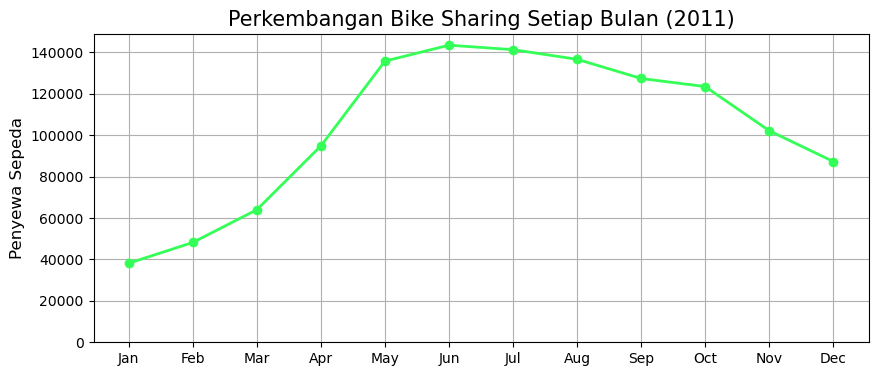

In [24]:
# memfilter data 2011
month_2011 = df_day[df_day["dteday"].dt.year == 2011].groupby(by=df_day["dteday"].dt.month).agg({
    "cnt": "sum"
})

# membuat line chart
plt.figure(figsize=(10, 4)) 
plt.plot(month_2011.index, month_2011["cnt"], marker='o', linewidth=2, color="#33FF57") 
plt.title("Perkembangan Bike Sharing Setiap Bulan (2011)", loc="center", fontsize=15) 
plt.xticks(month_2011.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=10) 
plt.yticks(fontsize=10)
plt.ylabel("Penyewa Sepeda", fontsize=12)
plt.ylim(0)
plt.grid(True)
plt.show()

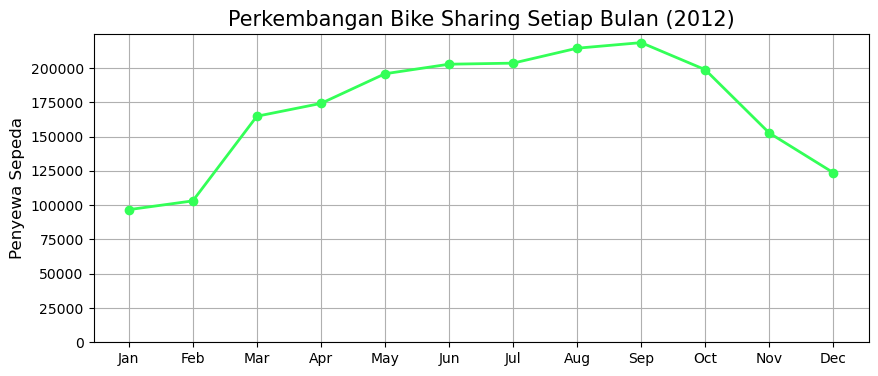

In [25]:
# memfilter data 2012
month_2012 = df_day[df_day["dteday"].dt.year >= 2012].groupby(by=df_day["dteday"].dt.month).agg({
    "cnt": "sum"
})

# membuat line chart
plt.figure(figsize=(10, 4))
plt.plot(month_2012.index, month_2012["cnt"], marker="o", linewidth=2, color="#33FF57")
plt.title("Perkembangan Bike Sharing Setiap Bulan (2012)", loc="center", fontsize=15)
plt.xticks(month_2012.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Penyewa Sepeda", fontsize=12)
plt.ylim(0)
plt.grid(True)
plt.show()

### Kondisi lingkungan mana yang memiliki jumlah penyewa sepeda tertinggi di tahun 2011 dan 2012

In [26]:
# filter data 2011
month_2011 = df_hour[df_hour["dteday"].dt.year < 2012].groupby(by="weathersit").agg({
    "cnt": "sum"
})
month_2011

,cnt
weathersit,
1,875053
2,300519
3,67495
4,36


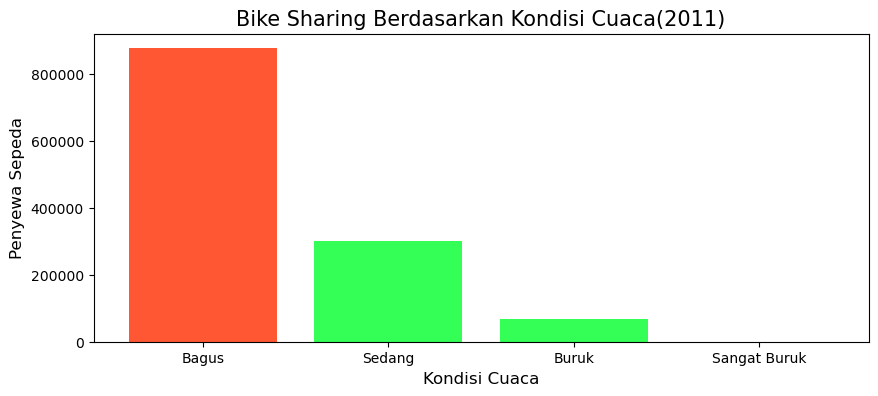

In [27]:
# membuat bar chart
plt.figure(figsize=(10, 4))
plt.bar(month_2011.index, month_2011["cnt"], color=["#FF5733", "#33FF57", "#33FF57", "#33FF57"])
plt.title("Bike Sharing Berdasarkan Kondisi Cuaca(2011)", fontsize=15)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Penyewa Sepeda", fontsize=12)
plt.xticks(month_2011.index, ["Bagus", "Sedang", "Buruk", "Sangat Buruk"], fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)
plt.show()

In [28]:
# filter data 2012
month_2012 = df_hour[df_hour["dteday"].dt.year >= 2012].groupby(by="weathersit").agg({
    "cnt": "sum"
})
month_2012

,cnt
weathersit,
1,1463120
2,495433
3,90836
4,187


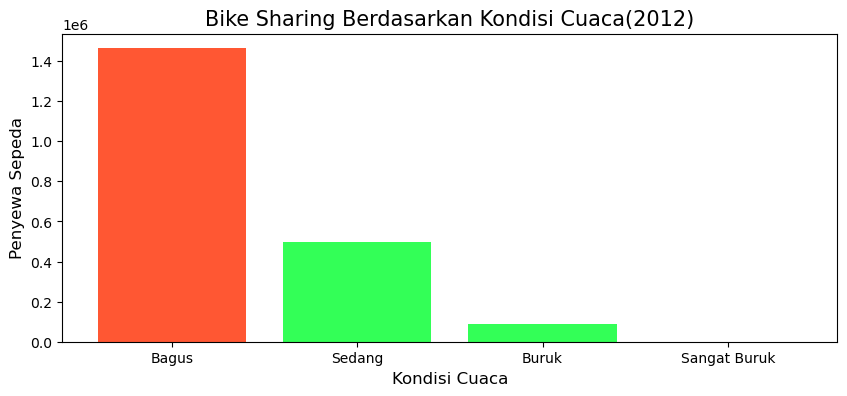

In [29]:
# membuat bar chart
plt.figure(figsize=(10, 4))
plt.bar(month_2012.index, month_2012["cnt"], color=["#FF5733", "#33FF57", "#33FF57", "#33FF57"])
plt.title("Bike Sharing Berdasarkan Kondisi Cuaca(2012)", fontsize=15)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Penyewa Sepeda", fontsize=12)
plt.xticks(month_2012.index, ["Bagus", "Sedang", "Buruk", "Sangat Buruk"], fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)
plt.show()

### Teknik analisis lanjutan Time Series Analysis

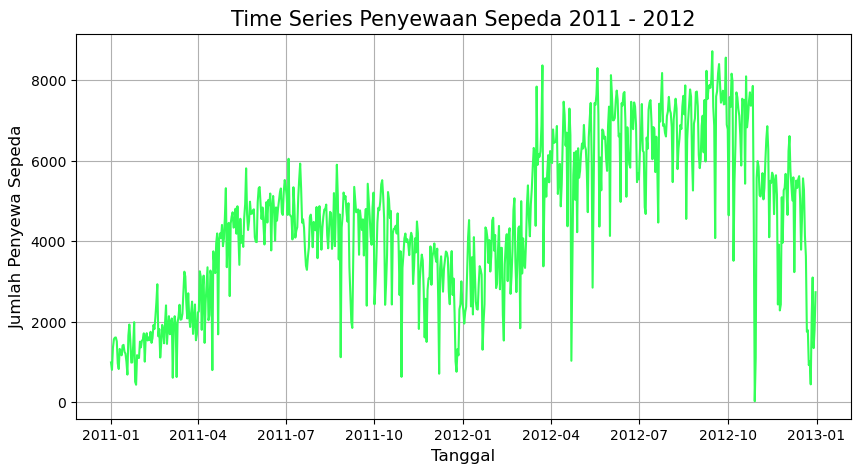

In [32]:
# mengatur dteday sebagai index
df_day.set_index('dteday')

# membuat line chart time series bike sharing
plt.figure(figsize=(10, 5))
plt.plot(df_day["dteday"], df_day["cnt"], color="#33FF57")
plt.title("Time Series Penyewaan Sepeda 2011 - 2012", fontsize=15)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Penyewa Sepeda", fontsize=12)
plt.grid(True)
plt.show()
# kode ini menghasilkan grafik line chart yang menggambarkan time series data jumlah
# penyewaan sepeda dari tahun 2011-2012, tujuannya memahami tren dan pola perubahan
# seiring berjalannya waktu dalam data bike sharing.

In [31]:
# menyimpan df_day dan df_hour dalam format csv.
df_day.to_csv("all_data1.csv", index=False)
df_hour.to_csv("all_data2.csv", index=False)